[1, 9, 2, 4, 5, 3, 6, 8, 7]
[(1, 2), (1, 4), (9, 5), (9, 6), (9, 8), (2, 5), (2, 3), (4, 8), (5, 6), (5, 8), (3, 6), (8, 7)]


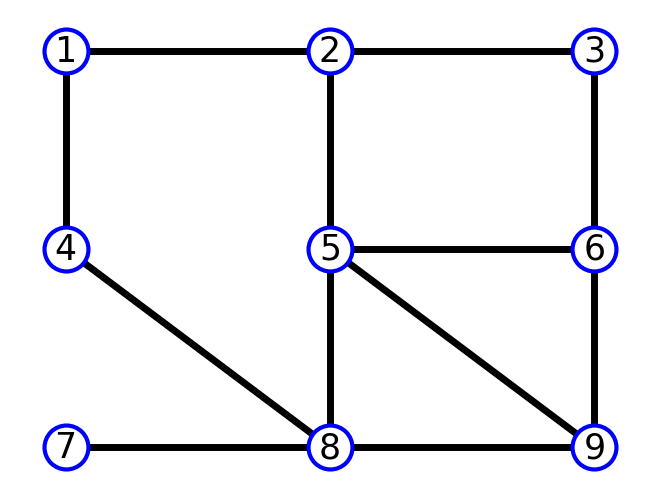

In [1]:
import networkx as nx

# Step 1: Create an undirected graph with no parallel edges
G = nx.Graph()

# Add the nodes and edges
G.add_nodes_from([1,9])
G.add_edges_from([(1,2),(1,4),
                  (2,1), (2,5), (2,3),
                  (3,2), (3,6),
                  (4,1), (5,2), (5,6), (5,8), (5,9),
                  (6,3), (6,5), (6,9),
                  (7,8), (8,4), (8,5), (8,9)])

# Position like the image:
pos = {
    7: (0, 0), 8: (1, 0), 9: (2, 0),
    4: (0, 1), 5: (1, 1), 6: (2, 1),
    1: (0, 2), 2: (1, 2), 3: (2, 2)
}

options = {
    "with_labels": True,
    "font_size": 25,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "blue",
    "linewidths": 3,
    "width": 5,
}

# Show the nodes and edges
print(G.nodes)
print(G.edges)

# Draw the graph
nx.draw(G, pos, **options)


In [6]:
#  Write to file in gtrieScanner-compatible format
with open("network.txt", "w") as f:
    for u, v in G.edges():
        f.write(f"{u} {v}\n")

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os

adj_matrix_1 = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 0],
    [0, 1, 0, 0]
]) # freq = 21

adj_matrix_2 = np.array([
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 1, 0, 0],
    [1, 0, 0, 0]
]) # freq = 5

adj_matrix_3 = np.array([
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 0],
    [1, 0, 0, 0]
]) # freq = 4 

adj_matrix_4 = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0]
]) # freq = 1

adj_matrix_5 = np.array([
    [0, 1, 1, 1],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 0]
]) # freq = 1


pos1 = {
    2: (0, 1), 3: (1, 1),
    0: (0, 2), 1: (1, 2), 
}

options2 = {
    "with_labels": False,
    "node_size": 150,
    "node_color": "black",
    "edgecolors": "black",
    "width": 3,
}

adj_matrices = [adj_matrix_1, adj_matrix_2, adj_matrix_3, adj_matrix_4, adj_matrix_5]

# Create output directory if it doesn't exist
output_dir = "subgraph_images"
os.makedirs(output_dir, exist_ok=True)

# Draw all graphs
for i, mat in enumerate(adj_matrices, 1):
    G = nx.from_numpy_array(mat)
    plt.figure(figsize=(1.5,1.5))
    plt.title(f"Subgraph {i}", fontsize=8)
    nx.draw(G, pos1, **options2)
    plt.axis("off")             # Hide axis
    plt.tight_layout()
    filepath = os.path.join(output_dir, f"subgraph{i}.png")
    plt.savefig(filepath, dpi=200)
    plt.close()



To generate the subgraphs, we plotted the network and saved its adjacency list to a `.txt` file containing 12 lines, each representing a pair of connected nodes (as shown in the code above).
After generating the file, we ran the following command in the shell to search for subgraphs of size 4 within the network:

`
gtrieScanner -s 4 -m esu -g network.txt -f simple
`

We got 5 subgraphs as shown in the table below:

## Subgraphs Table:

| Subgraph      | Frequency |
|----------------------|-----------|
| <img src="subgraph_images/subgraph1.png" width="100"/>   | 21        |
| <img src="subgraph_images/subgraph2.png" width="100"/>   | 5         |
| <img src="subgraph_images/subgraph3.png" width="100"/>   | 4         |
| <img src="subgraph_images/subgraph4.png" width="100"/>   | 1         |
| <img src="subgraph_images/subgraph5.png" width="100"/>   | 1         |

## b) ERDOS-RENYI

### 📊 Expected Subgraph Counts in Erdős–Rényi Graph \( G(n, p) \)

  - **Expected number of triangles**:

  $$
  \mathbb{E}[\text{Triangles}] = \binom{n}{3} \cdot p^3 = \frac{n(n - 1)(n - 2)}{6} \cdot p^3
  $$

- **Expected number of 3-node chains (Path of length 2)**:

  $$
  \mathbb{E}[\text{Chains}] = \binom{n}{3} \cdot 3p^2(1 - p) = \frac{n(n - 1)(n - 2)}{2} \cdot p^2(1 - p)
  $$

For testing the hypothesis we generated 2 networks containing 500 nodes and 1000 nodes and evaluated the error (%). After creating the networks, we used `Gtrie` to count the subgraphs with 3 nodes (chains and triangles), using the code below (example for the file with 1000 nodes):

`gtrieScanner -s 3 -m esu -g Expected1000_p0.1.txt -f simple`

In [92]:
from IPython.display import Markdown

def generate_erdos_renyi_and_save(n, p, filename):
    G = nx.erdos_renyi_graph(n, p)
    # Save as edge list (one edge per line, undirected)
    with open(f"{filename}.txt", "w") as f:
        for u, v in G.edges():
            f.write(f"{u+1} {v+1}\n")

def expected_triangles(n, p):
    return (n * (n - 1) * (n - 2) / 6) * (p ** 3)

def expected_chains(n, p):
    return (n * (n - 1) * (n - 2) / 2) * (p ** 2) * (1 - p)

Lets try 500 nodes

In [ ]:
n = 500

# Generate the adjency files (Only load the next cell when necessary!!!)
#for p in [0.01, 0.05, 0.1]:
    #generate_erdos_renyi_and_save(500, p, f"Teste_Expected500_p{p}")

# Calculate the expected frequencies
expected_triangles_1 = expected_triangles(n, 0.01)
expected_chains_1 = expected_chains(n, 0.01)

expected_triangles_2 = expected_triangles(n, 0.05)
expected_chains_2 = expected_chains(n, 0.05)

expected_triangles_3 = expected_triangles(n, 0.1)
expected_chains_3 = expected_chains(n, 0.1)

# Real frequencies (calculated by Gtrie)
real1_triangles = 19
real1_chains = 6642

real2_triangles = 2784
real2_chains = 151989

real3_triangles = 20197
real3_chains = 550481

from IPython.display import Markdown

def percentage_error(expected, real):
    return abs(expected - real) / expected * 100 if expected != 0 else 0

Markdown(f"""
### Subgraph Frequencies in Erdős–Rényi \( G(n=500, p) \) Networks

| Subgraph Type       | p = 0.01 (Expected) | p = 0.01 (Real) | Error (%) | p = 0.05 (Expected) | p = 0.05 (Real) | Error (%) | p = 0.1 (Expected) | p = 0.1 (Real) | Error (%) |
|---------------------|---------------------|------------------|-----------|----------------------|------------------|-----------|---------------------|-----------------|-----------|
| **Triangle**         | {expected_triangles_1:.2f} | {real1_triangles} | {percentage_error(expected_triangles_1, real1_triangles):.1f}% | {expected_triangles_2:.2f} | {real2_triangles} | {percentage_error(expected_triangles_2, real2_triangles):.1f}% | {expected_triangles_3:.2f} | {real3_triangles} | {percentage_error(expected_triangles_3, real3_triangles):.1f}% |
| **Chain (Path-3)**   | {expected_chains_1:.2f}    | {real1_chains}     | {percentage_error(expected_chains_1, real1_chains):.1f}% | {expected_chains_2:.2f}    | {real2_chains}     | {percentage_error(expected_chains_2, real2_chains):.1f}% | {expected_chains_3:.2f}    | {real3_chains}     | {percentage_error(expected_chains_3, real3_chains):.1f}% |

Le's try 1000 nodes for testing if we can obtain lower error values!
""")




### Subgraph Frequencies in Erdős–Rényi \( G(n=500, p) \) Networks

| Subgraph Type       | p = 0.01 (Expected) | p = 0.01 (Real) | Error (%) | p = 0.05 (Expected) | p = 0.05 (Real) | Error (%) | p = 0.1 (Expected) | p = 0.1 (Real) | Error (%) |
|---------------------|---------------------|------------------|-----------|----------------------|------------------|-----------|---------------------|-----------------|-----------|
| **Triangle**         | 20.71 | 19 | 8.3% | 2588.56 | 2784 | 7.6% | 20708.50 | 20197 | 2.5% |
| **Chain (Path-3)**   | 6150.42    | 6642     | 8.0% | 147548.06    | 151989     | 3.0% | 559129.50    | 550481     | 1.5% |

Le's try 1000 nodes for testing if we can obtain lower error values!


n = 1000

In [90]:
n = 1000

# Generate the adjency files (Only load the next cell when necessary!!!)
#for p in [0.01, 0.05, 0.1]:
    #generate_erdos_renyi_and_save(1000, p, f"Expected1000_p{p}")

# Calculate the expected frequencies
expected_triangles_1 = expected_triangles(n, 0.01)
expected_chains_1 = expected_chains(n, 0.01)

expected_triangles_2 = expected_triangles(n, 0.05)
expected_chains_2 = expected_chains(n, 0.05)

expected_triangles_3 = expected_triangles(n, 0.1)
expected_chains_3 = expected_chains(n, 0.1)

# Real frequencies (calculated by Gtrie)
real1_triangles = 151
real1_chains = 48076

real2_triangles = 20717
real2_chains = 1184104

real3_triangles = 164933
real3_chains = 4467024

from IPython.display import Markdown

def percentage_error(expected, real):
    return abs(expected - real) / expected * 100 if expected != 0 else 0

Markdown(f"""
### Subgraph Frequencies in Erdős–Rényi \( G(n=1000, p) \) Networks

| Subgraph Type       | p = 0.01 (Expected) | p = 0.01 (Real) | Error (%) | p = 0.05 (Expected) | p = 0.05 (Real) | Error (%) | p = 0.1 (Expected) | p = 0.1 (Real) | Error (%) |
|---------------------|---------------------|------------------|-----------|----------------------|------------------|-----------|---------------------|-----------------|-----------|
| **Triangle**         | {expected_triangles_1:.2f} | {real1_triangles} | {percentage_error(expected_triangles_1, real1_triangles):.1f}% | {expected_triangles_2:.2f} | {real2_triangles} | {percentage_error(expected_triangles_2, real2_triangles):.1f}% | {expected_triangles_3:.2f} | {real3_triangles} | {percentage_error(expected_triangles_3, real3_triangles):.1f}% |
| **Chain (Path-3)**   | {expected_chains_1:.2f}    | {real1_chains}     | {percentage_error(expected_chains_1, real1_chains):.1f}% | {expected_chains_2:.2f}    | {real2_chains}     | {percentage_error(expected_chains_2, real2_chains):.1f}% | {expected_chains_3:.2f}    | {real3_chains}     | {percentage_error(expected_chains_3, real3_chains):.1f}% |
""")


### Subgraph Frequencies in Erdős–Rényi \( G(n=1000, p) \) Networks

| Subgraph Type       | p = 0.01 (Expected) | p = 0.01 (Real) | Error (%) | p = 0.05 (Expected) | p = 0.05 (Real) | Error (%) | p = 0.1 (Expected) | p = 0.1 (Real) | Error (%) |
|---------------------|---------------------|------------------|-----------|----------------------|------------------|-----------|---------------------|-----------------|-----------|
| **Triangle**         | 166.17 | 151 | 9.1% | 20770.88 | 20717 | 0.3% | 166167.00 | 164933 | 0.7% |
| **Chain (Path-3)**   | 49351.60    | 48076     | 2.6% | 1183939.88    | 1184104     | 0.0% | 4486509.00    | 4467024     | 0.4% |


## 7c

In [107]:
adj_matrix_1 = np.array([
    [0, 1, 1],
    [0, 0, 1],
    [0, 0, 0]
]) # freq = 130

adj_matrix_2 = np.array([
    [0, 0, 1],
    [1, 0, 0],
    [0, 0, 0]
]) # freq = 250

adj_matrix_3 = np.array([
    [0, 1, 1],
    [0, 0, 0],
    [0, 0, 0]
]) # freq = 168

adj_matrix_4 = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 0, 0]
]) # freq = 126


options2 = {
    "with_labels": False,
    "node_size": 150,
    "node_color": "black",
    "edgecolors": "black",
    "width": 3,
}

adj_matrices = [adj_matrix_1, adj_matrix_2, adj_matrix_3, adj_matrix_4]

# Create output directory if it doesn't exist
output_dir = "motifs_images_directed"
os.makedirs(output_dir, exist_ok=True)

# Draw all graphs as directed
for i, mat in enumerate(adj_matrices, 1):
    G = nx.from_numpy_array(mat, create_using=nx.DiGraph)  # <-- Make it directed
    plt.figure(figsize=(1.5,1.5))
    plt.title(f"Subgraph {i}", fontsize=8)
    nx.draw(G, pos1, arrows=True, **options2)  # arrows=True to show direction
    plt.axis("off")
    plt.tight_layout()
    filepath = os.path.join(output_dir, f"motif{i}.png")
    plt.savefig(filepath, dpi=200)
    plt.close()


Markdown(f"""
### 🧬 Motif Analysis of *E. coli* Transcriptional Regulatory Network

#### Summary of gtrieScanner Results

We analyzed the directed network using `gtrieScanner` to identify all 3-node subgraphs (motifs) with the code bellow:
         
`gtrieScanner-s 3-m gtrie dir3.gt-d-g ecoli.txt-r 500-raw`

 After comparing the real network to 500 randomized networks with the same degree sequence, we obtained the following results:


| Subgraph Type (ID) | Structure                                   | Real Frequency | Random Avg | Std Dev | Z-Score |
|--------------------|---------------------------------------------|----------------|-------------|---------|---------|
| **ID: 011-001-000** | <img src="motifs_images_directed/motif1.png" width="100"/> | 130            | 12.05       | 3.22    | **36.63** |
| **ID: 001-100-000** | <img src="motifs_images_directed/motif2.png" width="100"/> | 250            | 345.19      | 13.91   | **-6.84** |
| **ID: 011-000-000** | <img src="motifs_images_directed/motif3.png" width="100"/> | 168            | 278.06      | 7.12    | **-15.46** |
| **ID: 000-100-100** | <img src="motifs_images_directed/motif4.png" width="100"/> | 126            | 237.74      | 5.99    | **-18.66** |
       
As supported by the literature, the most statistically significant motif is the **Feedforward Loop (FFL)** (see picture of subgraph 1):  
> *"A transcription factor X regulates a second transcription factor Y, and both jointly regulate one or more operons Z₁...Zₙ. An example of a feedforward loop is the L-arabinose utilization system."*  
— *Milo et al., 2004*  """)


### 🧬 Motif Analysis of *E. coli* Transcriptional Regulatory Network

#### Summary of gtrieScanner Results

We analyzed the directed network using `gtrieScanner` to identify all 3-node subgraphs (motifs) with the code bellow:
         
`gtrieScanner-s 3-m gtrie dir3.gt-d-g ecoli.txt-r 500-raw`

 After comparing the real network to 500 randomized networks with the same degree sequence, we obtained the following results:


| Subgraph Type (ID) | Structure                                   | Real Frequency | Random Avg | Std Dev | Z-Score |
|--------------------|---------------------------------------------|----------------|-------------|---------|---------|
| **ID: 011-001-000** | <img src="motifs_images_directed/motif1.png" width="100"/> | 130            | 12.05       | 3.22    | **36.63** |
| **ID: 001-100-000** | <img src="motifs_images_directed/motif2.png" width="100"/> | 250            | 345.19      | 13.91   | **-6.84** |
| **ID: 011-000-000** | <img src="motifs_images_directed/motif3.png" width="100"/> | 168            | 278.06      | 7.12    | **-15.46** |
| **ID: 000-100-100** | <img src="motifs_images_directed/motif4.png" width="100"/> | 126            | 237.74      | 5.99    | **-18.66** |
       
As supported by the literature, the most statistically significant motif is the **Feedforward Loop (FFL)** (see picture of subgraph 1):  
> *"A transcription factor X regulates a second transcription factor Y, and both jointly regulate one or more operons Z₁...Zₙ. An example of a feedforward loop is the L-arabinose utilization system."*  
— *Milo et al., 2004*  

## 7D

For completing this task first we ran the following code for each of the 8 networks:

`gtrieScanner -s 3 -d -m gtrie dir3.gt -g yeast.txt -r 100 -raw`

After that we extracted the Z scores of all 13 patterns and created a vector with that. An important key to have in mind here is that the motifs are in the same order in the output of `Gtrie` algorithm.

Then we normalize all the vectors and plotted them.

In [112]:
# First we loaded the Z-scores vectors

z_vector_circuit1 = np.array([
    9.82,    # motif 1
    1.88,    # motif 2
    1.60,    # motif 3
    -2.76,   # motif 4
    0.0,     # motif 5
    0.0,     # motif 6
    0.0,     # motif 7
    0.0,     # motif 8
    0.0,     # motif 9
    0.0,     # motif 10
    0.0,     # motif 11
    0.0,     # motif 12
    0.0      # motif 13
])

z_vector_circuit2 = np.array([
    18.00,    # motif 1
    1.76,    # motif 2
    1.65,    # motif 3
    -6.40,   # motif 4
    0.0,     # motif 5
    0.0,     # motif 6
    0.0,     # motif 7
    0.0,     # motif 8
    0.0,     # motif 9
    0.0,     # motif 10
    0.0,     # motif 11
    0.0,     # motif 12
    0.0      # motif 13
])

z_vector_ecoli = np.array([
    32.94,    # motif 1
    -7.83,    # motif 2
    -16.82,    # motif 3
    -21.81,   # motif 4
    0.0,     # motif 5
    0.0,     # motif 6
    0.0,     # motif 7
    0.0,     # motif 8
    0.0,     # motif 9
    0.0,     # motif 10
    0.0,     # motif 11
    0.0,     # motif 12
    0.0      # motif 13
])

z_vector_english = np.array([
    34.09,   # motif 1
    29.78,   # motif 2
    28.90,   # motif 3
    23.65,   # motif 4
    20.96,   # motif 5
   -14.55,   # motif 6
   -18.66,   # motif 7
   -22.14,   # motif 8
   -24.23,   # motif 9
   -24.55,   # motif 10
   -31.21,   # motif 11
   -33.74,   # motif 12
   -35.17    # motif 13
])

z_vector_french = np.array([
    26.48,   # motif 1
    22.87,   # motif 2
    19.89,   # motif 3
    15.14,   # motif 4
    4.85,    # motif 5
   -9.23,    # motif 6
  -12.98,    # motif 7
  -19.35,    # motif 8
  -23.15,    # motif 9
  -26.22,    # motif 10
  -27.53,    # motif 11
  -27.73,    # motif 12
  -42.95     # motif 13
])

z_vector_highschool = np.array([
    186.95,   # motif 1
    42.97,    # motif 2
    15.37,    # motif 3
    14.24,    # motif 4
    11.75,    # motif 5
    5.45,     # motif 6
    3.86,     # motif 7
    3.05,     # motif 8
   -5.29,     # motif 9
   -5.66,     # motif 10
  -14.80,     # motif 11
  -16.13,     # motif 12
  -17.94      # motif 13
])

z_vector_residence = np.array([
    907.12,   # motif 1
    164.64,   # motif 2
    145.86,   # motif 3
    31.01,    # motif 4
    18.22,    # motif 5
    17.31,    # motif 6
    16.86,    # motif 7
    3.14,     # motif 8
   -17.91,    # motif 9
   -25.81,    # motif 10
   -46.94,    # motif 11
   -49.09,    # motif 12
   -51.75     # motif 13
])

z_vector_yeast = np.array([
    0.0,     # motif 1: 010-100-110 → inf
    0.0,     # motif 2: 011-100-010 → inf
    13.98,   # motif 3: 011-001-000
    2.91,    # motif 4: 011-100-000
   -9.79,    # motif 5: 001-100-000
  -10.13,    # motif 6: 011-000-000
  -14.44,    # motif 7: 000-100-100
   0.0,      # motif 8: 001-100-010 → nan
   0.0,      # motif 9: 010-100-100 → nan
   0.0,      # motif 10: 011-100-100 → nan
   0.0,      # motif 11: 011-101-000 → nan
   0.0,      # motif 12: 011-101-100 → nan
   0.0       # motif 13: 011-101-110 → nan
])

def normalize_Z(vector):
    vector = np.array(vector)
    norm = np.linalg.norm(vector)  # sqrt(sum of squares)
    return vector / norm if norm != 0 else vector

z_vector_circuit1_norm = normalize_Z(z_vector_circuit1)
z_vector_circuit2_norm = normalize_Z(z_vector_circuit2)
z_vector_ecoli_norm = normalize_Z(z_vector_ecoli)
z_vector_english_norm = normalize_Z(z_vector_english)
z_vector_french_norm = normalize_Z(z_vector_french)
z_vector_highschool_norm = normalize_Z(z_vector_highschool)
z_vector_residence_norm = normalize_Z(z_vector_residence)
z_vector_yeast_norm = normalize_Z(z_vector_yeast)

In [ ]:
# Define your 13 directed 3-node motif adjacency matrices
adj_matrices = [
    np.array([[0, 1, 0], [1, 0, 0], [1, 1, 0]]),
    np.array([[0, 1, 1], [1, 0, 0], [0, 1, 0]]),
    np.array([[0, 1, 1], [0, 0, 1], [0, 0, 0]]),
    np.array([[0, 1, 1], [1, 0, 0], [0, 0, 0]]),
    np.array([[0, 0, 1], [1, 0, 0], [0, 0, 0]]),
    np.array([[0, 1, 1], [0, 0, 0], [0, 0, 0]]),
    np.array([[0, 0, 0], [1, 0, 0], [1, 0, 0]]),
    np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]]),
    np.array([[0, 1, 0], [1, 0, 0], [1, 0, 0]]),
    np.array([[0, 1, 1], [1, 0, 0], [1, 0, 0]]),
    np.array([[0, 1, 1], [1, 0, 1], [0, 0, 0]]),
    np.array([[0, 1, 1], [1, 0, 1], [1, 0, 0]]),
    np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
]

# Drawing options
options2 = {
    "with_labels": False,
    "node_size": 100,
    "node_color": "black",
    "edgecolors": "black",
    "width": 2.5,
}

# Fixed position layout
pos1 = {
    0: (0, 1), 1: (1, 1),
    2: (0.5, 0)
}

# Output folder
output_dir = "motifs_pngs_3"
os.makedirs(output_dir, exist_ok=True)

# Draw and export as PNG
for i, mat in enumerate(adj_matrices, 1):
    G = nx.from_numpy_array(mat, create_using=nx.DiGraph)
    plt.figure(figsize=(1, 1))
    #plt.title(f"Motif {i}", fontsize=8)
    nx.draw(G, pos=pos1, arrows=True, **options2)
    plt.axis("off")
    #plt.tight_layout()
    filepath = os.path.join(output_dir, f"motif{i}.png")
    plt.savefig(filepath, format='png', dpi=200)  
    plt.close()


C:\Users\1\AppData\Local\Temp\ipykernel_748\2132356139.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


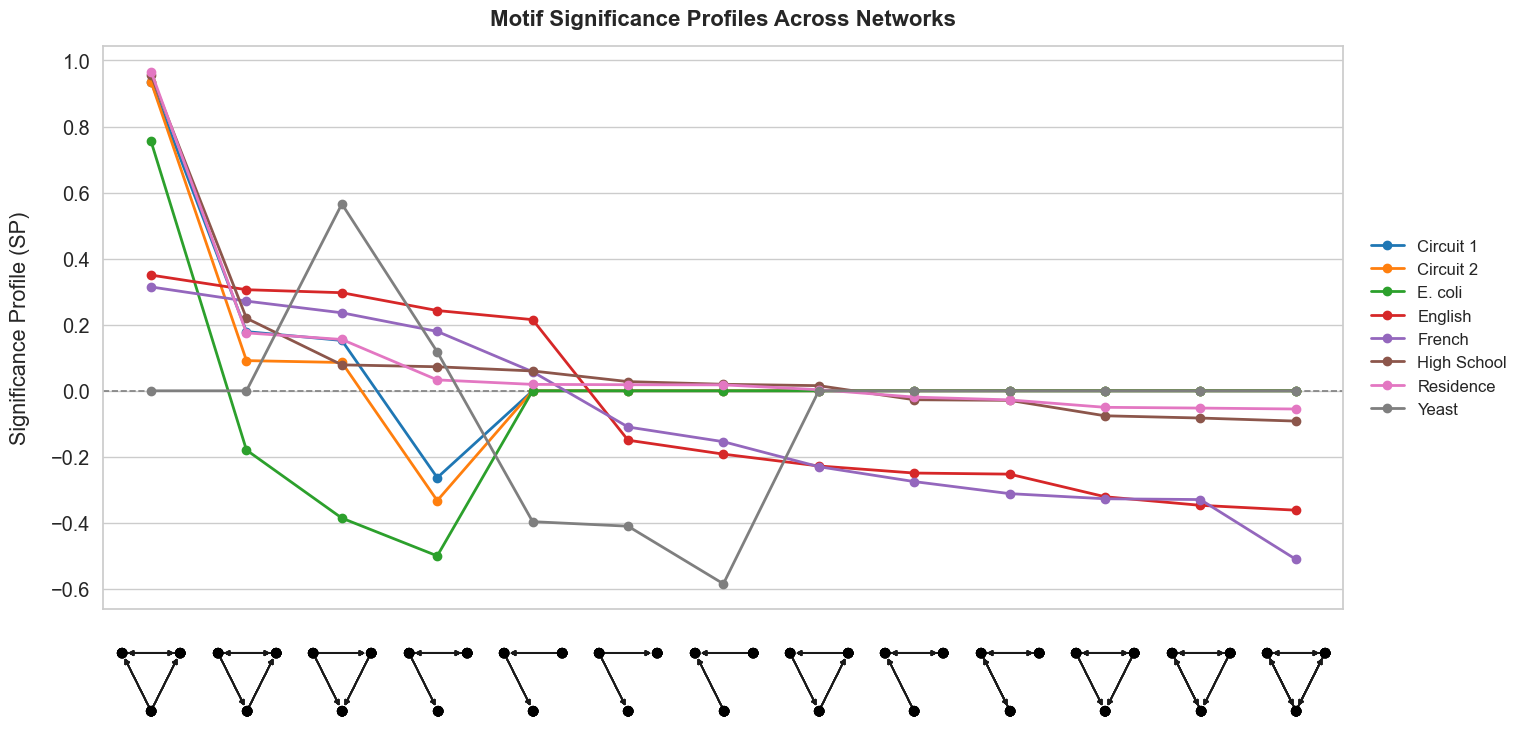

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import gridspec
import seaborn as sns

sns.set(style="whitegrid", context="notebook", font_scale=1.3)

# SP matrix (replace with your normalized vectors)
sp_matrix = np.array([
    z_vector_circuit1_norm,
    z_vector_circuit2_norm,
    z_vector_ecoli_norm,
    z_vector_english_norm,
    z_vector_french_norm,
    z_vector_highschool_norm,
    z_vector_residence_norm,
    z_vector_yeast_norm
])

network_labels = [
    "Circuit 1", "Circuit 2", "E. coli", "English",
    "French", "High School", "Residence", "Yeast"
]

motif_image_paths = [f"motifs_pngs_3/motif{i+1}.png" for i in range(13)] 

# Create figure with two subplots: top for SP, bottom for motif images
fig = plt.figure(figsize=(16, 9))
gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1], hspace=0.05)

# --- Top subplot: SP plot ---
ax0 = plt.subplot(gs[0])
palette = sns.color_palette("tab10", n_colors=len(sp_matrix))

for i, sp in enumerate(sp_matrix):
    ax0.plot(range(13), sp, marker='o', label=network_labels[i],
             linewidth=2.0, markersize=6, color=palette[i], zorder=3)

ax0.axhline(0, color='gray', linestyle='--', linewidth=1.2, zorder=1)

ax0.set_xlim(-0.5, 12.5)
ax0.set_xticks([])  # No ticks because we’ll use images
ax0.set_ylabel("Significance Profile (SP)", labelpad=15)
ax0.set_title("Motif Significance Profiles Across Networks", fontsize=16, weight='bold', pad=15)
ax0.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), frameon=False, fontsize=12)

# --- Bottom subplot: Motif images ---
ax1 = plt.subplot(gs[1])
ax1.axis("off")  # Hide axis completely

for x, img_path in enumerate(motif_image_paths):
    try:
        img = mpimg.imread(img_path)
        imagebox = OffsetImage(img, zoom=0.25)
        ab = AnnotationBbox(imagebox, (x, 0.5), frameon=False, box_alignment=(0.5, 0.5))
        ax1.add_artist(ab)
    except FileNotFoundError:
        print(f"Image not found: {img_path}")

ax1.set_xlim(-0.5, 12.5)
ax1.set_ylim(0, 1)

plt.tight_layout()
plt.show()

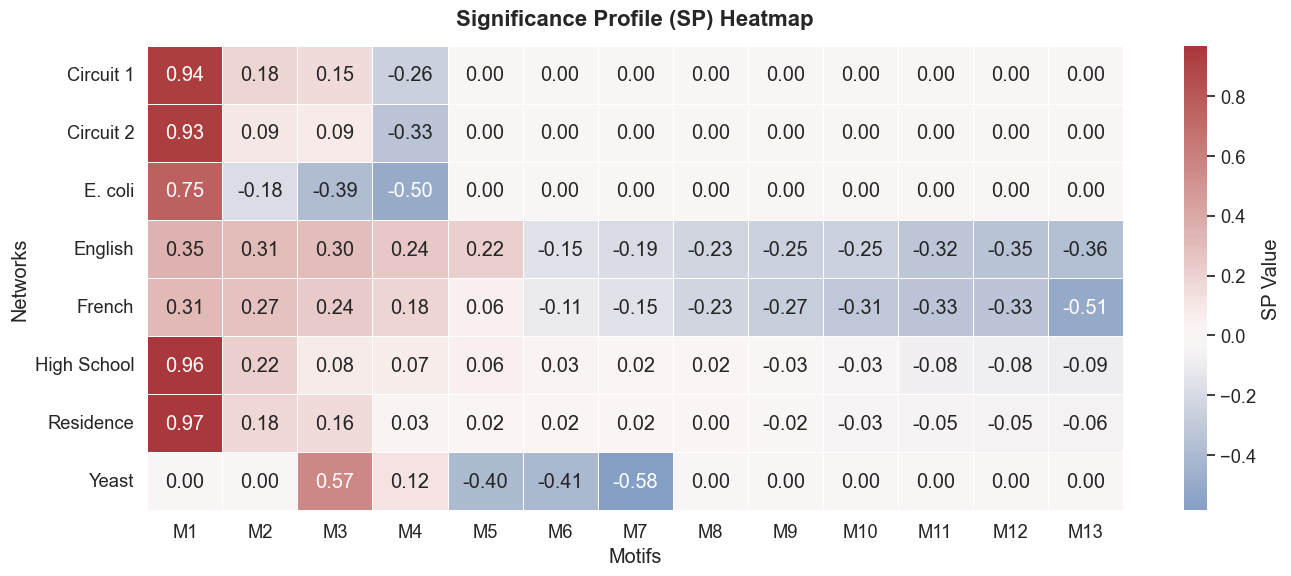

In [164]:
# SP matrix: shape (8 networks, 13 motifs)
sp_matrix = np.array([
    z_vector_circuit1_norm,
    z_vector_circuit2_norm,
    z_vector_ecoli_norm,
    z_vector_english_norm,
    z_vector_french_norm,
    z_vector_highschool_norm,
    z_vector_residence_norm,
    z_vector_yeast_norm
])

network_labels = [
    "Circuit 1", "Circuit 2", "E. coli", "English",
    "French", "High School", "Residence", "Yeast"
]

motif_labels = [f"M{i+1}" for i in range(13)]

plt.figure(figsize=(14, 6))
sns.set(style="white", context="notebook", font_scale=1.2)

ax = sns.heatmap(sp_matrix, cmap="vlag", center=0, linewidths=0.5, 
                 xticklabels=motif_labels, yticklabels=network_labels,
                 annot=True, fmt=".2f", cbar_kws={'label': 'SP Value'})

ax.set_title("Significance Profile (SP) Heatmap", fontsize=16, weight='bold', pad=15)
plt.xlabel("Motifs")
plt.ylabel("Networks")
plt.tight_layout()
plt.show()

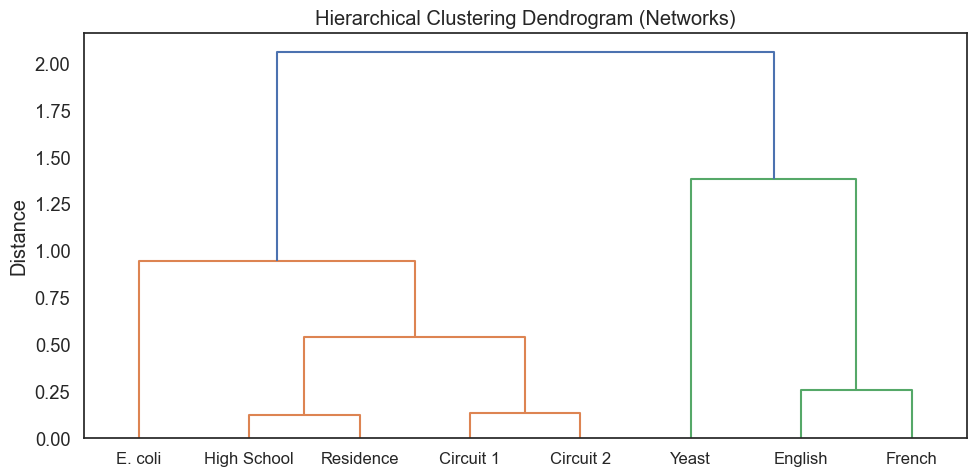

In [165]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Assuming sp_matrix and network_labels are already defined
# sp_matrix shape: (8 networks, 13 motifs)
# Rows = networks

# Perform hierarchical clustering
linked = linkage(sp_matrix, method='ward')  # or 'average', 'complete'

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, 
           labels=network_labels, 
           orientation='top', 
           distance_sort='ascending', 
           show_leaf_counts=True)

plt.title("Hierarchical Clustering Dendrogram (Networks)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


## 7E

In [167]:
z_vector_netA = np.array([
    43.93,    # motif 1
    1.99,    # motif 2
    1.50,    # motif 3
    -15.18,   # motif 4
    0.0,     # motif 5
    0.0,     # motif 6
    0.0,     # motif 7
    0.0,     # motif 8
    0.0,     # motif 9
    0.0,     # motif 10
    0.0,     # motif 11
    0.0,     # motif 12
    0.0      # motif 13
])

z_vector_netB = np.array([
    0,    # motif 1
    6.50,    # motif 2
    4.77,    # motif 3
    2.92,   # motif 4
    2.49,     # motif 5
    1.68,     # motif 6
    1.14,     # motif 7
    0.95,     # motif 8
    -1.55,     # motif 9
    -2.00,     # motif 10
    -4.03,     # motif 11
    -4.83,     # motif 12
    -4.83      # motif 13
])

z_vector_netC = np.array([
    9.23,    # motif 1
    8.53,    # motif 2
    8.05,    # motif 3
    5.56,   # motif 4
    0.41,     # motif 5
    -3.84,     # motif 6
    -6.31,     # motif 7
    -7.00,     # motif 8
    -7.89,     # motif 9
    -8.93,     # motif 10
    -11.05,     # motif 11
    -11.24,     # motif 12
    -16.45      # motif 13
])

z_vector_netA_norm = normalize_Z(z_vector_netA)
z_vector_netB_norm = normalize_Z(z_vector_netB)
z_vector_netC_norm = normalize_Z(z_vector_netC)

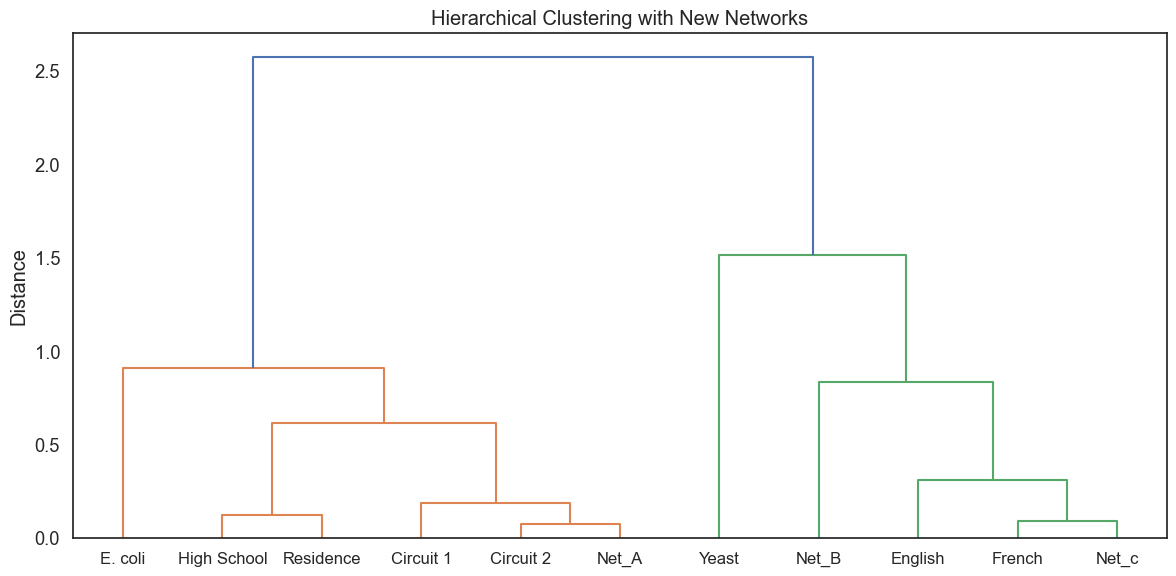

In [168]:
new_sp_matrix = np.array([
    z_vector_netA_norm,
    z_vector_netB_norm,
    z_vector_netC_norm
])

# Stack them vertically
combined_matrix = np.vstack([sp_matrix, new_sp_matrix])

# Perform hierarchical clustering
linked_all = linkage(combined_matrix, method='ward')

# Combined labels (original + new)
combined_labels = network_labels + ["Net_A", "Net_B", "Net_c"]

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked_all,
           labels=combined_labels,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title("Hierarchical Clustering with New Networks")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

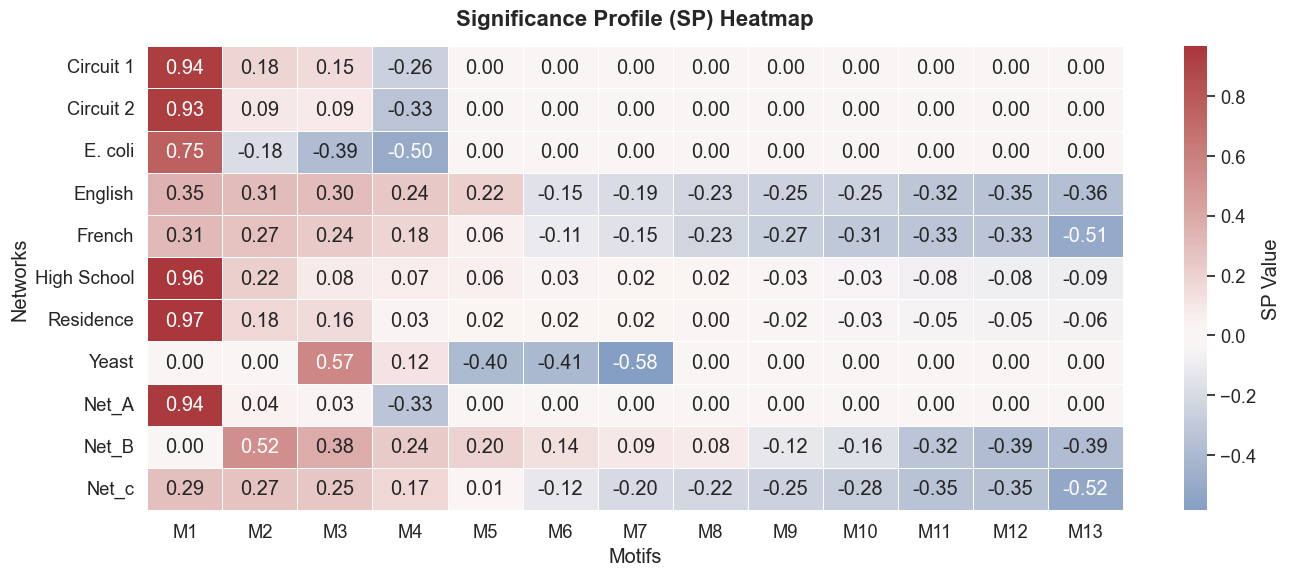

In [169]:
plt.figure(figsize=(14, 6))
sns.set(style="white", context="notebook", font_scale=1.2)

ax = sns.heatmap(combined_matrix, cmap="vlag", center=0, linewidths=0.5, 
                 xticklabels=motif_labels, yticklabels=combined_labels,
                 annot=True, fmt=".2f", cbar_kws={'label': 'SP Value'})

ax.set_title("Significance Profile (SP) Heatmap", fontsize=16, weight='bold', pad=15)
plt.xlabel("Motifs")
plt.ylabel("Networks")
plt.tight_layout()
plt.show()

As shown above, the unknown networks belong to different clusters:
-   `Net_A` shows similar patterns to *circuit1 and circuit2*, suggesting it may be a circuit network.
-   `Net_B` shows simmilar patterns to *english or yeast*, indicating it could be either a language or a biological network.
-   `Net_C` shows simmilar patterns to *english and french* so it could be a language network.